In [101]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import math 


In [102]:
df=pd.read_csv("./data/hour.csv")

In [103]:
df.head(5)

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [104]:
df.columns

Index(['index', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'demand'],
      dtype='object')

In [105]:
df.dtypes

index           int64
date           object
season          int64
year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
demand          int64
dtype: object

In [106]:
df.shape

(17379, 17)

In [107]:
#drop the irrelevant columns
df.drop(["index","date","casual","registered"],axis=1,inplace=True)

In [108]:
df.shape

(17379, 13)

In [109]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [110]:
df.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

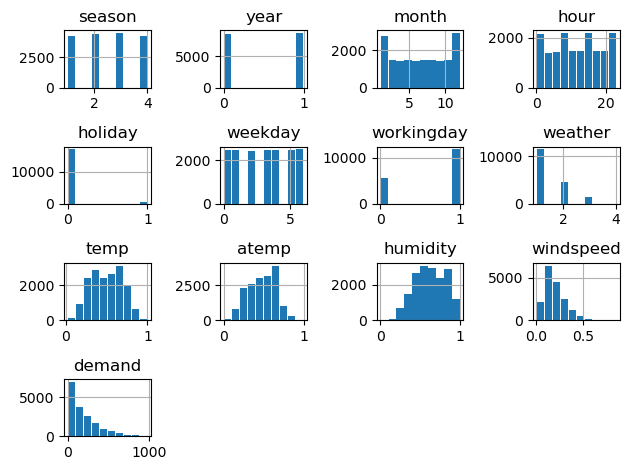

In [111]:
#visulaise data quickly using the hkstogram function of the pandas

df.hist(rwidth=.9)
plt.tight_layout()

In [112]:
df['season'].value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

In [113]:
df['year'].value_counts()

year
1    8734
0    8645
Name: count, dtype: int64

In [114]:
df['holiday'].value_counts()

holiday
0    16879
1      500
Name: count, dtype: int64

In [115]:
df['workingday'].value_counts()

workingday
1    11865
0     5514
Name: count, dtype: int64

In [116]:
df['weather'].value_counts()

weather
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

Continious feature vs demand
(season,year,holiday,workingday,weather)

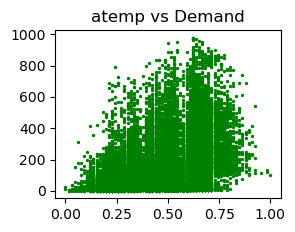

In [117]:
plt.subplot(2,2,1)
plt.title("atemp vs Demand")
plt.scatter(df["atemp"],df["demand"],s=2,c='g')

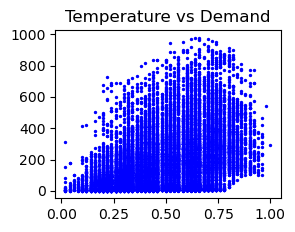

In [118]:
plt.subplot(2,2,2)
plt.title("Temperature vs Demand")
plt.scatter(df["temp"],df["demand"],s=2,c='b')

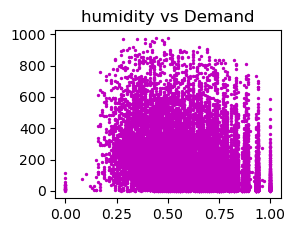

In [119]:
plt.subplot(2,2,2)
plt.title("humidity vs Demand")
plt.scatter(df["humidity"],df["demand"],s=2,c='m')

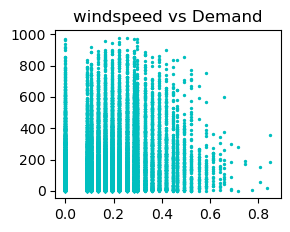

In [120]:
plt.subplot(2,2,2)
plt.title("windspeed vs Demand")
plt.scatter(df["windspeed"],df["demand"],s=2,c='c')

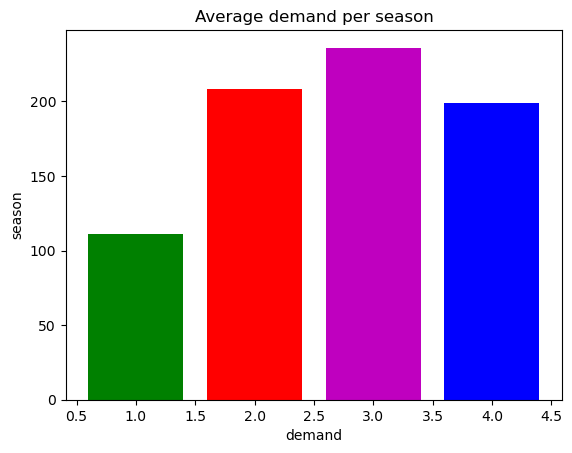

In [121]:
# average demand per season chart

plt.title("Average demand per season")
# create a list of unique season values
season_list=df['season'].unique()
season_average=df.groupby('season').mean()['demand']
colors=['g','r','m','b']
plt.bar(season_list,season_average,color=colors)
plt.xlabel("demand")
plt.ylabel("season")
plt.show()

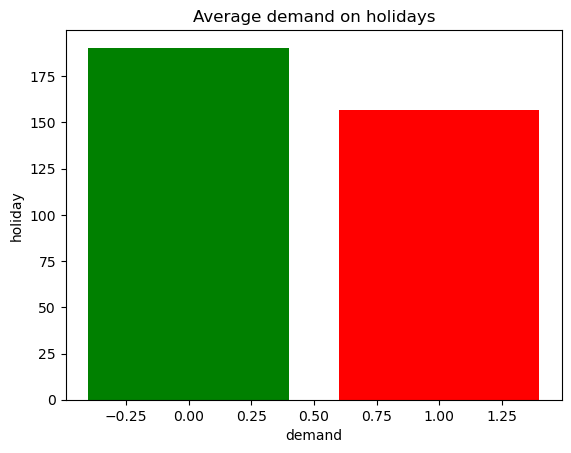

In [122]:
# check for demands in holdays (x-demand,y-holiday)

plt.title("Average demand on holidays")
# create a list of unique season values
season_list=df['holiday'].unique()
season_average=df.groupby('holiday').mean()['demand']
colors=['g','r','m','b']
plt.bar(season_list,season_average,color=colors)
plt.xlabel("demand")
plt.ylabel("holiday")
plt.show()

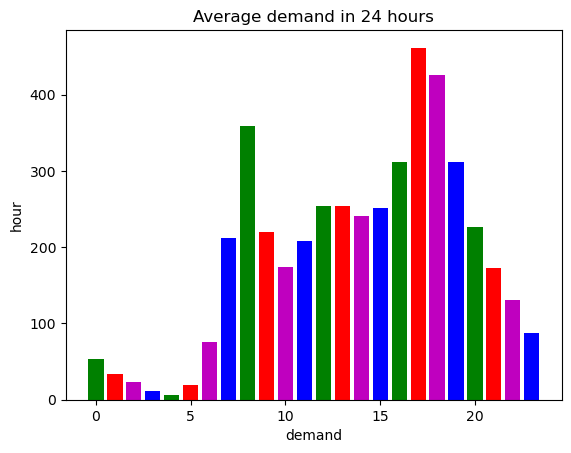

In [123]:
# check for demands in holdays (x-demand,y-holiday)

plt.title("Average demand in 24 hours")
# create a list of unique season values
season_list=df['hour'].unique()
season_average=df.groupby('hour').mean()['demand']
colors=['g','r','m','b']
plt.bar(season_list,season_average,color=colors)
plt.xlabel("demand")
plt.ylabel("hour")
plt.show()

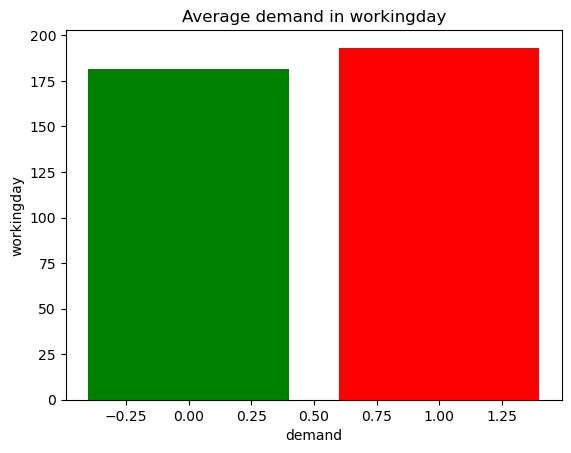

In [124]:
# check for demands in holdays (x-demand,y-holiday)

plt.title("Average demand in workingday")
# create a list of unique season values
season_list=df['workingday'].unique()
season_average=df.groupby('workingday').mean()['demand']
colors=['g','r','m','b']
plt.bar(season_list,season_average,color=colors)
plt.xlabel("demand")
plt.ylabel("workingday")
plt.show()

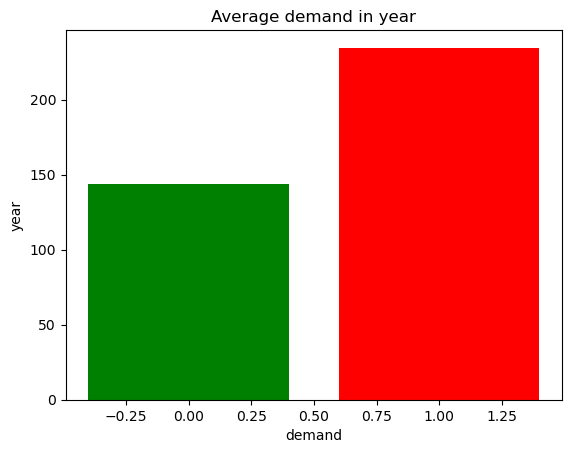

In [125]:
# check for demands in holdays (x-demand,y-holiday)

plt.title("Average demand in year")
# create a list of unique season values
season_list=df['year'].unique()
season_average=df.groupby('year').mean()['demand']
colors=['g','r','m','b']
plt.bar(season_list,season_average,color=colors)
plt.xlabel("demand")
plt.ylabel("year")
plt.show()

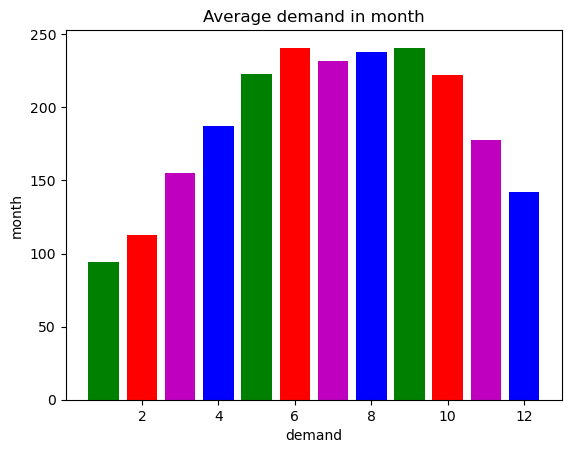

In [126]:
# check for demands in holdays (x-demand,y-holiday)

plt.title("Average demand in month")
# create a list of unique season values
season_list=df['month'].unique()
season_average=df.groupby('month').mean()['demand']
colors=['g','r','m','b']
plt.bar(season_list,season_average,color=colors)
plt.xlabel("demand")
plt.ylabel("month")
plt.show()

1. demand is not normally distributed.
2. temperature and demand appear to have direct correlation
3. the plot for temp and atemp appears almost identical.

In [127]:
df.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [128]:
df_imp_feature_set=df.loc[:,['season','month','holiday','hour','weather', 'temp', 'atemp']]

In [129]:
print(df_imp_feature_set.head())
print(df_imp_feature_set.shape)

   season  month  holiday  hour  weather  temp   atemp
0       1      1        0     0        1  0.24  0.2879
1       1      1        0     1        1  0.22  0.2727
2       1      1        0     2        1  0.22  0.2727
3       1      1        0     3        1  0.24  0.2879
4       1      1        0     4        1  0.24  0.2879
(17379, 7)


In [130]:
y=df['demand']

In [131]:
y.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

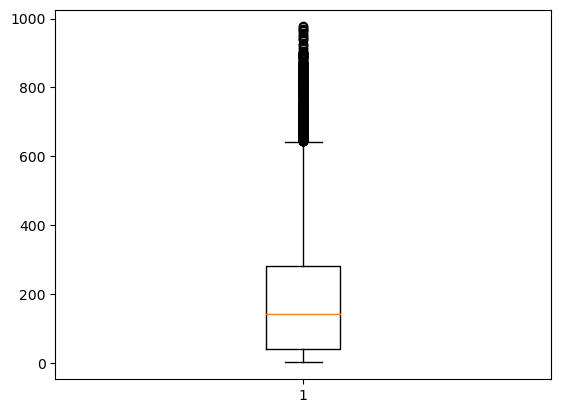

In [132]:
plt.boxplot(y)
plt.show()

In [133]:
y.quantile([.05,.1,.15,.9,.95,.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [134]:
df3=pd.concat([df_imp_feature_set,y],axis=1)

In [135]:
df3.head()

,season,month,holiday,hour,weather,temp,atemp,demand
0,1,1,0,0,1,0.24,0.2879,16
1,1,1,0,1,1,0.22,0.2727,40
2,1,1,0,2,1,0.22,0.2727,32
3,1,1,0,3,1,0.24,0.2879,13
4,1,1,0,4,1,0.24,0.2879,1


look for the multi collinearity

In [136]:
corr_matrix=df3.corr()

In [137]:
corr_matrix

,season,month,holiday,hour,weather,temp,atemp,demand
season,1.000000,0.830386,-0.009585,-0.006117,-0.014524,0.312025,0.319380,0.178056
month,0.830386,1.000000,0.018430,-0.005772,0.005400,0.201691,0.208096,0.120638
holiday,-0.009585,0.018430,1.000000,0.000479,-0.017036,-0.027340,-0.030973,-0.030927
hour,-0.006117,-0.005772,0.000479,1.000000,-0.020203,0.137603,0.133750,0.394071
weather,-0.014524,0.005400,-0.017036,-0.020203,1.000000,-0.102640,-0.105563,-0.142426
temp,0.312025,0.201691,-0.027340,0.137603,-0.102640,1.000000,0.987672,0.404772
atemp,0.319380,0.208096,-0.030973,0.133750,-0.105563,0.987672,1.000000,0.400929
demand,0.178056,0.120638,-0.030927,0.394071,-0.142426,0.404772,0.400929,1.000000


In [138]:
t_1=y.shift(+1).to_frame()
t_2=y.shift(+2).to_frame()
t_3=y.shift(+3).to_frame()

In [139]:
timeseries_demand=pd.concat([t_1,t_2,t_3],axis=1)

In [140]:
timeseries_demand.head()

,demand,demand,demand
0,NaN,NaN,NaN
1,16.0,NaN,NaN
2,40.0,16.0,NaN
3,32.0,40.0,16.0
4,13.0,32.0,40.0


In [142]:
timeseries_demand.columns=['column_1','column_2','column_3']

In [143]:
timeseries_demand.columns

Index(['column_1', 'column_2', 'column_3'], dtype='object')

In [144]:
timeseries_lag=timeseries_demand.dropna()

In [145]:
timeseries_lag

,column_1,column_2,column_3
3,32.0,40.0,16.0
4,13.0,32.0,40.0
5,1.0,13.0,32.0
6,1.0,1.0,13.0
7,2.0,1.0,1.0
...,...,...,...
17374,122.0,164.0,214.0
17375,119.0,122.0,164.0
17376,89.0,119.0,122.0
17377,90.0,89.0,119.0


In [150]:
cat_features=df.loc[:,['season','holiday','weather','month','hour']]

In [151]:
cat_features

,season,holiday,weather,month,hour
0,1,0,1,1,0
1,1,0,1,1,1
2,1,0,1,1,2
3,1,0,1,1,3
4,1,0,1,1,4
...,...,...,...,...,...
17374,1,0,2,12,19
17375,1,0,2,12,20
17376,1,0,1,12,21
17377,1,0,1,12,22


In [154]:
cat_features.dtypes

season     int64
holiday    int64
weather    int64
month      int64
hour       int64
dtype: object

In [160]:
cat_features['season']=cat_features['season'].astype('category')
cat_features['holiday']=cat_features['holiday'].astype('category')
cat_features['weather']=cat_features['weather'].astype('category')
cat_features['month']=cat_features['month'].astype('category')
cat_features['hour']=cat_features['hour'].astype('category')

In [161]:
cat_features.dtypes

season     category
holiday    category
weather    category
month      category
hour       category
dtype: object

In [162]:
dummy_df=pd.get_dummies(cat_features,drop_first=True,dtype=int)

In [163]:
dummy_df

,season_2,season_3,season_4,holiday_1,weather_2,weather_3,weather_4,month_2,month_3,month_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17375,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [164]:
df.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Ridge 
ridge=Ridge(alpha=1)